In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from load_results import load_setup_1, load_setup_2, PARAM_COLUMNS, RESULT_COLUMNS, FITNESS_FUNCTIONS

%matplotlib inline

In [3]:
df = load_setup_1()
df.head()

,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,Booth's function,False,-,-,13,5,0.5,1.5,0.1,-,0.984780,1.0,500.0,0.000000,9.090909
1,Booth's function,False,-,-,13,5,0.5,1.5,0.5,-,0.998687,1.0,500.0,0.454545,19.090909
2,Booth's function,False,-,-,13,5,0.5,1.5,0.9,-,1.000000,1.0,500.0,1.000000,44.181818
3,Booth's function,False,-,-,13,5,1.0,1.0,0.1,-,0.985024,1.0,500.0,0.000000,13.727273
4,Booth's function,False,-,-,13,5,1.0,1.0,0.5,-,0.998192,1.0,500.0,0.272727,89.818182


In [4]:
# inspect values in Experiment setup
for column in PARAM_COLUMNS:
    print(f'{column}: {df[column].unique()}')

fitness_function: ["Booth's function" 'Schwefel function' 'Shubert function']
use_constraint: [False  True]
constraint_handling_method: ['-' 'Penalty Method' 'Rejection Method']
constraint: ['-' 'Constraint 10' 'Constraint 3' 'Constraint 5']
particle_speed_limit: [13]
population_size: [ 5 10 35 80]
personal_confidence: [0.5 1.  1.5]
swarm_confidence: [1.5 1.  0.5]
particle_inertia: [0.1 0.5 0.9]
constraint_r: ['-' -2.0 -1.5 -1.0]


# Evaluation 

## Penalty Method



In [5]:
df_constraint_10 = df[df.use_constraint].reset_index()
df_constraint_10 = df[df.constraint == 'Constraint 10'].reset_index()
df_constraint_10['constraint_method'] = df_constraint_10.apply(lambda row: ('P ' + str(row.constraint_r) if row.constraint_handling_method == 'Penalty Method' else 'R'), axis=1)
df_constraint_10 = df_constraint_10.groupby(['fitness_function', 'constraint', 'constraint_method'])[RESULT_COLUMNS].mean().reset_index()
df_constraint_10

,fitness_function,constraint,constraint_method,fitness,optimum_reached,iterations_to_opt
0,Booth's function,Constraint 10,P -1.0,0.915623,0.596310,37.433537
1,Booth's function,Constraint 10,P -1.5,0.914347,0.702160,30.233621
2,Booth's function,Constraint 10,P -2.0,0.916036,0.628227,38.954195
3,Booth's function,Constraint 10,R,0.896834,0.348438,69.156916
4,Schwefel function,Constraint 10,P -1.0,0.920254,0.457421,60.582071
5,Schwefel function,Constraint 10,P -1.5,0.918609,0.395412,73.019957
6,Schwefel function,Constraint 10,P -2.0,0.921383,0.446303,78.671542
7,Schwefel function,Constraint 10,R,0.908604,0.371750,54.165264
8,Shubert function,Constraint 10,P -1.0,0.494839,0.599186,24.963103
9,Shubert function,Constraint 10,P -1.5,0.495139,0.623737,26.084736


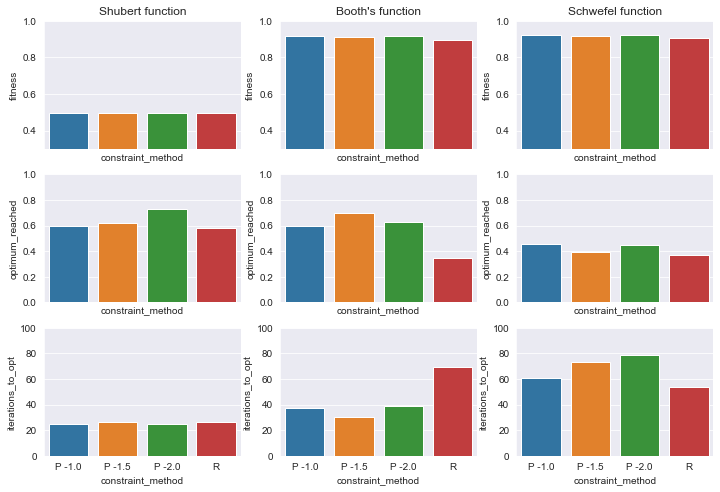

In [6]:
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for result_column, axe in zip(RESULT_COLUMNS, axes):
    for fitness_function, ax in zip(FITNESS_FUNCTIONS, axe):
        sns.barplot(
            data=df_constraint_10[df_constraint_10.fitness_function == fitness_function],
            x='constraint_method',
            y=result_column,
            ax=ax)
for ax, fitness_function in zip(axes[0], FITNESS_FUNCTIONS):
    ax.set_ylim(0.3, 1.0)
    ax.set_title(fitness_function)
for ax in axes[1]:
    ax.set_ylim(0.0, 1.0)
for ax in axes[2]:
    ax.set_ylim(0, 100)

In [7]:
df_constraint_3 = df[df.use_constraint].reset_index()
df_constraint_3 = df[df.constraint == 'Constraint 3'].reset_index()
df_constraint_3['constraint_method'] = df_constraint_3.apply(lambda row: ('P ' + str(row.constraint_r) if row.constraint_handling_method == 'Penalty Method' else 'R'), axis=1)
df_constraint_3 = df_constraint_3.groupby(['fitness_function', 'constraint', 'constraint_method'])[RESULT_COLUMNS].mean().reset_index()
df_constraint_3

,fitness_function,constraint,constraint_method,fitness,optimum_reached,iterations_to_opt
0,Booth's function,Constraint 3,P -1.0,0.999667,0.759224,14.869704
1,Booth's function,Constraint 3,P -1.5,0.999802,0.779181,18.588208
2,Booth's function,Constraint 3,P -2.0,0.998399,0.789141,16.946409
3,Booth's function,Constraint 3,R,0.997876,0.777053,15.149118
4,Schwefel function,Constraint 3,P -1.0,0.981869,0.643308,31.618897
5,Schwefel function,Constraint 3,P -1.5,0.975829,0.618646,33.912199
6,Schwefel function,Constraint 3,P -2.0,0.982015,0.610290,37.681376
7,Schwefel function,Constraint 3,R,0.961807,0.196981,24.544671
8,Shubert function,Constraint 3,P -1.0,0.984410,0.844276,26.138994
9,Shubert function,Constraint 3,P -1.5,0.957411,0.796857,27.455633


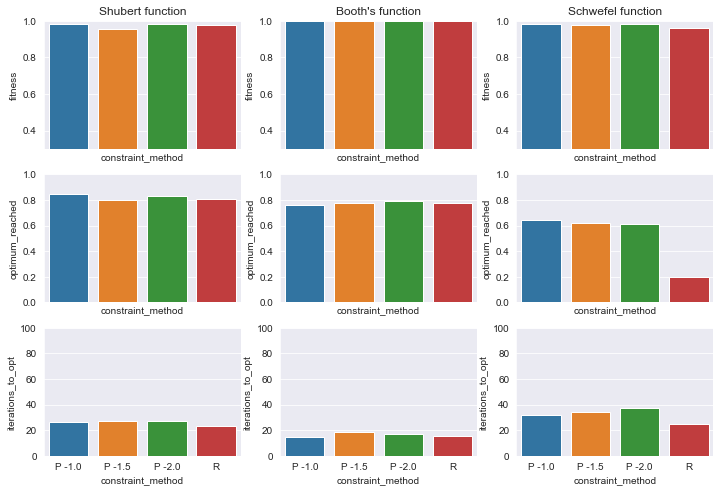

In [8]:
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for result_column, axe in zip(RESULT_COLUMNS, axes):
    for fitness_function, ax in zip(FITNESS_FUNCTIONS, axe):
        sns.barplot(
            data=df_constraint_3[df_constraint_3.fitness_function == fitness_function],
            x='constraint_method',
            y=result_column,
            ax=ax)
for ax, fitness_function in zip(axes[0], FITNESS_FUNCTIONS):
    ax.set_ylim(0.3, 1.0)
    ax.set_title(fitness_function)
for ax in axes[1]:
    ax.set_ylim(0.0, 1.0)
for ax in axes[2]:
    ax.set_ylim(0, 100)

In [9]:
df_constraint_5 = df[df.use_constraint].reset_index()
df_constraint_5 = df[df.constraint == 'Constraint 5'].reset_index()
df_constraint_5['constraint_method'] = df_constraint_5.apply(lambda row: ('P ' + str(row.constraint_r) if row.constraint_handling_method == 'Penalty Method' else 'R'), axis=1)
df_constraint_5 = df_constraint_5.groupby(['fitness_function', 'constraint', 'constraint_method'])[RESULT_COLUMNS].mean().reset_index()
df_constraint_5

,fitness_function,constraint,constraint_method,fitness,optimum_reached,iterations_to_opt
0,Booth's function,Constraint 5,P -1.0,0.998778,0.662949,19.062605
1,Booth's function,Constraint 5,P -1.5,0.997570,0.614689,18.279461
2,Booth's function,Constraint 5,P -2.0,0.996808,0.620125,22.047594
3,Booth's function,Constraint 5,R,0.997207,0.602507,21.350051
4,Schwefel function,Constraint 5,P -1.0,0.945374,0.537834,78.523052
5,Schwefel function,Constraint 5,P -1.5,0.928843,0.547103,95.494914
6,Schwefel function,Constraint 5,P -2.0,0.940025,0.557870,72.142677
7,Schwefel function,Constraint 5,R,0.881108,0.101221,48.756465
8,Shubert function,Constraint 5,P -1.0,0.836013,0.370791,49.205282
9,Shubert function,Constraint 5,P -1.5,0.894856,0.518483,51.062991


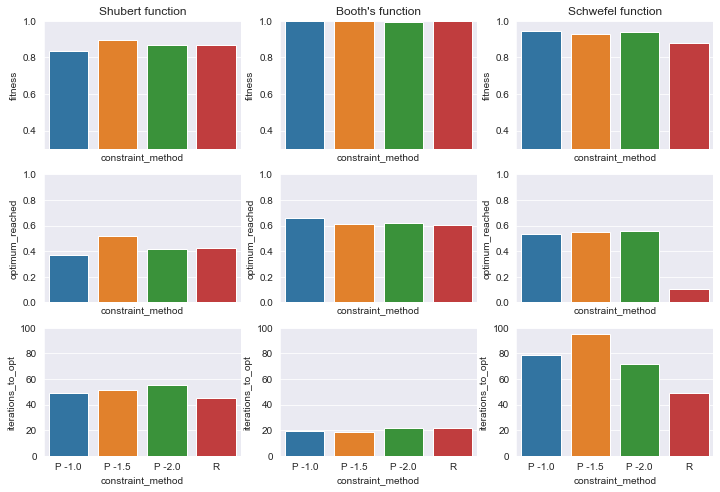

In [18]:
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for result_column, axe in zip(RESULT_COLUMNS, axes):
    for fitness_function, ax in zip(FITNESS_FUNCTIONS, axe):
        sns.barplot(
            data=df_constraint_5[df_constraint_5.fitness_function == fitness_function],
            x='constraint_method',
            y=result_column,
            ax=ax)
for ax, fitness_function in zip(axes[0], FITNESS_FUNCTIONS):
    ax.set_ylim(0.3, 1.0)
    ax.set_title(fitness_function)
for ax in axes[1]:
    ax.set_ylim(0.0, 1.0)
for ax in axes[2]:
    ax.set_ylim(0, 100)

In [19]:
df_constraint_all = df[df.use_constraint].reset_index()
df_constraint_all['constraint_method'] = df_constraint_all.apply(lambda row: ('P ' + str(row.constraint_r) if row.constraint_handling_method == 'Penalty Method' else 'R'), axis=1)
df_constraint_all = df_constraint_all.groupby(['fitness_function', 'constraint', 'constraint_method'])[RESULT_COLUMNS].mean().reset_index()
df_constraint_all

a = {'Constraint 3': df_constraint_3, 'Constraint 5': df_constraint_5, 'Constraint 10': df_constraint_10}

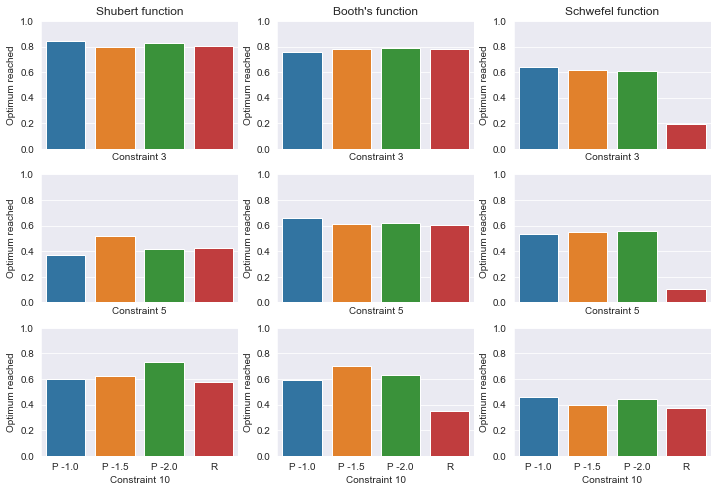

In [20]:
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for result_column, axe in zip(['Constraint 3', 'Constraint 5', 'Constraint 10'], axes):
    dfx = a[result_column]
    for fitness_function, ax in zip(FITNESS_FUNCTIONS, axe):
        sns.barplot(
            data=dfx[dfx.fitness_function == fitness_function],
            x='constraint_method',
            y='optimum_reached',
            ax=ax).set(xlabel=result_column, ylabel='Optimum reached')
for ax, fitness_function in zip(axes[0], FITNESS_FUNCTIONS):
    ax.set_ylim(0.0, 1.0)
    ax.set_title(fitness_function)
for ax in axes[1]:
    ax.set_ylim(0.0, 1.0)
for ax in axes[2]:
    ax.set_ylim(0.0, 1.0)

In [13]:
df_no_optimum = df[df.use_constraint & (df.optimum_reached == 0.0)].reset_index()

df_no_optimum['optimum_not_found'] = df_no_optimum.apply(lambda row: 1, axis=1)
df_no_optimum.groupby(['fitness_function', 'constraint', 'constraint_handling_method'])['optimum_not_found'].sum()

fitness_function   constraint     constraint_handling_method
Booth's function   Constraint 10  Penalty Method                 7
                                  Rejection Method              23
                   Constraint 3   Penalty Method                 6
                                  Rejection Method               2
                   Constraint 5   Penalty Method                23
                                  Rejection Method              29
Schwefel function  Constraint 10  Penalty Method                36
                                  Rejection Method              45
                   Constraint 3   Penalty Method                25
                                  Rejection Method              56
                   Constraint 5   Penalty Method                40
                                  Rejection Method              73
Shubert function   Constraint 10  Penalty Method                 4
                                  Rejection Method               4
 

In [21]:

df_no_optimum.groupby(['fitness_function', 'constraint_handling_method'])['optimum_not_found'].sum()

fitness_function   constraint_handling_method
Booth's function   Penalty Method                 36
                   Rejection Method               54
Schwefel function  Penalty Method                101
                   Rejection Method              174
Shubert function   Penalty Method                 31
                   Rejection Method               26
Name: optimum_not_found, dtype: int64